In [3]:
#Import libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Import dataset
df=pd.read_csv("weatherAUS.csv")
print(df.shape)

(145460, 23)


# Data Exploration

In [6]:
#Find no of missing values
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

# Uni-variant analysis

In [7]:
df["RainTomorrow"].isnull().sum()

3267

In [8]:
df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

In [9]:
df["RainTomorrow"].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [10]:
#Dropping null values of dependant
df.dropna(subset=['RainTomorrow'],inplace=True)

In [11]:
df.shape

(142193, 23)

In [12]:
df["RainTomorrow"].unique()

array(['No', 'Yes'], dtype=object)

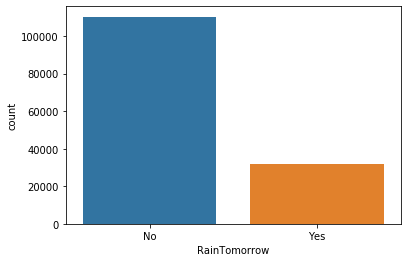

In [13]:
sns.countplot(x="RainTomorrow",data=df)
plt.show()

# Bivariant Analysis

We have categorical and numeric variables.And we analyse them seperately

In [14]:
cat= [i for i in df.columns if df[i].dtype=="object"]
print(f'There are {len(cat)} number of categorical variables and those are {cat}')

There are 7 number of categorical variables and those are ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [15]:
df[cat].isna().sum() #Finding null values

Date                0
Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

In [16]:
#Checking for high cardinality in categorical variables
for var in cat:
    print( var, 'contains  ',len(df[var].unique()),'  labels')

#Date has lot of labels which needs to be processed.

Date contains   3436   labels
Location contains   49   labels
WindGustDir contains   17   labels
WindDir9am contains   17   labels
WindDir3pm contains   17   labels
RainToday contains   3   labels
RainTomorrow contains   2   labels


# Feature engineering

In [17]:
#Processing date variable to reduce cardinality
df["Date"].dtype

dtype('O')

In [18]:
df["Date"]=pd.to_datetime(df["Date"])
df["Date"].dtype

dtype('<M8[ns]')

In [19]:
df["Year"]=df["Date"].dt.year
df['Year'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int64

In [20]:
df["Month"]=df["Date"].dt.month
df["Month"].head()

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int64

In [21]:
df['Day'] = df['Date'].dt.day
df['Day'].head()

0    1
1    2
2    3
3    4
4    5
Name: Day, dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           142193 non-null  datetime64[ns]
 1   Location       142193 non-null  object        
 2   MinTemp        141556 non-null  float64       
 3   MaxTemp        141871 non-null  float64       
 4   Rainfall       140787 non-null  float64       
 5   Evaporation    81350 non-null   float64       
 6   Sunshine       74377 non-null   float64       
 7   WindGustDir    132863 non-null  object        
 8   WindGustSpeed  132923 non-null  float64       
 9   WindDir9am     132180 non-null  object        
 10  WindDir3pm     138415 non-null  object        
 11  WindSpeed9am   140845 non-null  float64       
 12  WindSpeed3pm   139563 non-null  float64       
 13  Humidity9am    140419 non-null  float64       
 14  Humidity3pm    138583 non-null  float64       
 15  

In [23]:
#Drop date column
df.drop("Date",axis=1,inplace=True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [24]:
# find categorical variables after Date removal
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :', categorical)

There are 6 categorical variables

The categorical variables are : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [25]:
df[categorical].isna().sum()

Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

In [26]:
#Explore location variable
len(df["Location"].unique())

49

In [27]:
#There are 49 labels and let us do One hot encoding for Location variable

pd.get_dummies(df.Location,drop_first=True).head()

,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
#There are 17 labels and let us do One hot encoding for WindGustDir variable
pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [29]:
#There are 17 labels and let us do One hot encoding for WindDir9am variable
pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
#There are 17 labels and let us do One hot encoding for WindDir3pm variable
pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [31]:
#RainToday dummies
pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).head()

,Yes,NaN
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


# Explore numerical variables

In [32]:
numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 19 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


In [33]:
#Missing numerical values
#sorted(df[numerical].isnull().sum())
df[numerical].isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
Year                 0
Month                0
Day                  0
dtype: int64

In [34]:
#Finding outliers .As per below, we observe Rainfall,Evaporation, WindSpeed9am and WindSpeed3pm columns may contain outliers.
print(round(df[numerical].describe()),2)

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  141556.0  141871.0  140787.0      81350.0   74377.0       132923.0   
mean       12.0      23.0       2.0          5.0       8.0           40.0   
std         6.0       7.0       8.0          4.0       4.0           14.0   
min        -8.0      -5.0       0.0          0.0       0.0            6.0   
25%         8.0      18.0       0.0          3.0       5.0           31.0   
50%        12.0      23.0       0.0          5.0       8.0           39.0   
75%        17.0      28.0       1.0          7.0      11.0           48.0   
max        34.0      48.0     371.0        145.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      140845.0      139563.0     140419.0     138583.0     128179.0   
mean           14.0          19.0         69.0         51.0       1018.0   
std             9.0           9.0         19.0         21.0          7.0   
mi

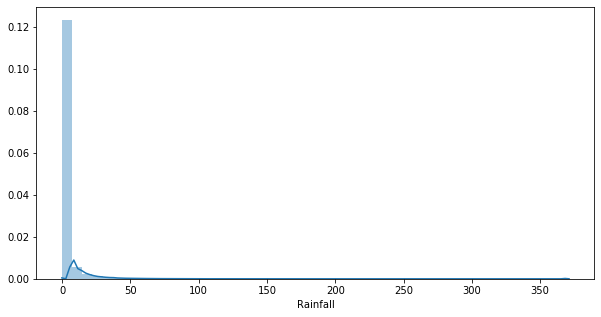

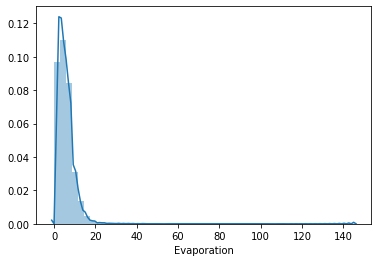

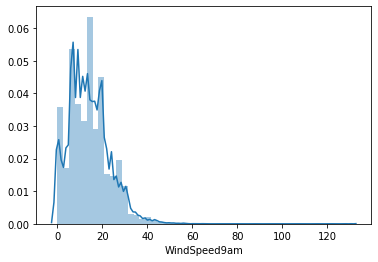

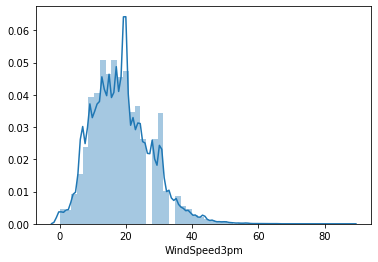

In [35]:
outlier=['Rainfall','Evaporation', 'WindSpeed9am','WindSpeed3pm']

plt.figure(figsize=(10,5))
for i in outlier:
    sns.distplot(df[i])
    plt.xlabel(i)
    plt.show()


In [36]:
#Let us find outliers for 4 variables
#Outliers range greater than values can be deleted in later stages and min can be ignored(as min is more than the below limits).

for i in outlier:
    #print (df.i)
    IQR = df[i].quantile(0.75) - df[i].quantile(0.25)
    Lower_fence = df[i].quantile(0.25) - (IQR * 3)
    Upper_fence = df[i].quantile(0.75) + (IQR * 3)
    print('{column} outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence
                                                                                      ,column=i))

Rainfall outliers are values < -2.4000000000000004 or > 3.2
Evaporation outliers are values < -11.800000000000002 or > 21.800000000000004
WindSpeed9am outliers are values < -29.0 or > 55.0
WindSpeed3pm outliers are values < -20.0 or > 57.0


# Multi variant analysis

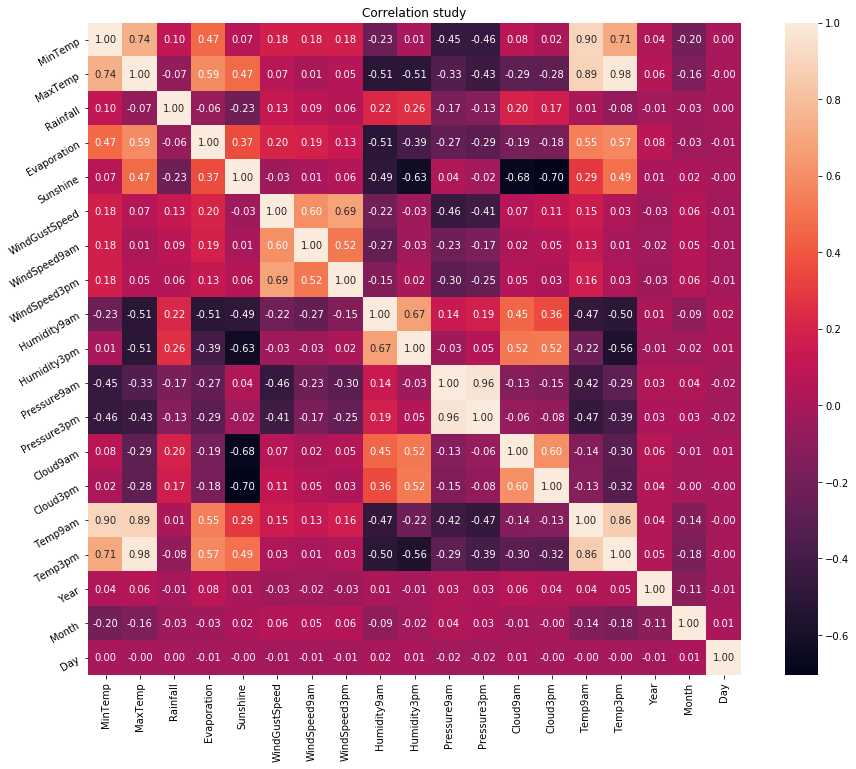

In [37]:
correlation=df.corr()
plt.figure(figsize=(16,12))
plt.title("Correlation study")
ax=sns.heatmap(correlation,square=True,annot=True,fmt=".2f",linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

In [38]:
#From above correlation map, we see MinTemp and MaxTemp,MinTemp and Temp3pm ,MinTemp and Temp9am,MaxTemp and Temp9am,MaxTemp and Temp3pm,
#WindGustSpeed and WindSpeed3pm,Pressure9am and Pressure3pm,Temp9am and Temp3pm are highly correlated.

In [39]:
#Dependant and independant split
x=df.drop(["RainTomorrow"],axis=1)
y=df["RainTomorrow"]

In [40]:
print(x.shape ,",",y.shape)

(142193, 24) , (142193,)


In [41]:
#Split train and test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [42]:
print(x_train.shape ,",",x_test.shape)

(113754, 24) , (28439, 24)


# Feature engineering

In [43]:
# display categorical variables
categorical = [col for col in x_train.columns if x_train[col].dtypes == 'O']
categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [44]:
# display numerical variables
numerical = [col for col in x_train.columns if x_train[col].dtypes != 'O']
numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

In [45]:
# percentage of missing values in numerical variables in X_train
x_train[numerical].isnull().sum()/len(x_train)

MinTemp          0.004351
MaxTemp          0.002321
Rainfall         0.010013
Evaporation      0.428275
Sunshine         0.477469
WindGustSpeed    0.064763
WindSpeed9am     0.009547
WindSpeed3pm     0.018408
Humidity9am      0.012738
Humidity3pm      0.025406
Pressure9am      0.098564
Pressure3pm      0.098335
Cloud9am         0.379213
Cloud3pm         0.402342
Temp9am          0.006505
Temp3pm          0.019085
Year             0.000000
Month            0.000000
Day              0.000000
dtype: float64

In [46]:
#Impute missing values with Median values as we have outliers in some variables as seen earlier.
for df1 in [x_train,x_test]:
    for col in numerical:
        col_median=x_train[col].median()
        df1[col].fillna(col_median,inplace=True)

In [47]:
x_test[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [48]:
#Similarly imputing missing values for categorical
x_train[categorical].isnull().mean()

Location       0.000000
WindGustDir    0.065114
WindDir9am     0.070134
WindDir3pm     0.026443
RainToday      0.010013
dtype: float64

In [49]:
for df2 in [x_train,x_test]:
    for col in categorical:
        col_mode=x_train[col].mode()[0]
        df2[col].fillna(col_mode,inplace=True)

In [50]:
x_train.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

In [51]:
x_train.shape

(113754, 24)

In [52]:
#Removing outliers as explained earlier
def max_value(df3,variable,top):
    return np.where(df3[variable]>top,top,df3[variable])

for df3 in [x_train,x_test]:
    df3['Rainfall'] = max_value(df3, 'Rainfall', 3.2)
    df3['Evaporation'] = max_value(df3, 'Evaporation', 21.8)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 55)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 57)

In [53]:
x_train.Rainfall.max(), x_test.Rainfall.max()

(3.2, 3.2)

In [54]:
x_train.describe() #Outliers removed

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,12.193497,23.237216,0.675080,5.151606,8.041154,39.884074,13.978155,18.614756,68.867486,51.509547,1017.640649,1015.241101,4.651801,4.703588,16.995062,21.688643,2012.759727,6.404021,15.710419
std,6.388279,7.094149,1.183837,2.823707,2.769480,13.116959,8.806558,8.685862,18.935587,20.530723,6.738680,6.675168,2.292726,2.117847,6.463772,6.855649,2.540419,3.427798,8.796821
min,-8.200000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,2007.000000,1.000000,1.000000
25%,7.600000,18.000000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.300000,16.700000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.300000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,3.200000,21.800000,14.500000,135.000000,55.000000,57.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,8.000000,40.200000,46.700000,2017.000000,12.000000,31.000000


# Encoding categorical

In [55]:
categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [56]:
x_train[categorical].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
113462,Witchcliffe,S,SSE,S,No
89638,Cairns,ENE,SSE,SE,Yes
138130,AliceSprings,E,NE,N,No
87898,Cairns,ESE,SSE,E,No
16484,Newcastle,W,N,SE,No


In [57]:
conda install category_encoders

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [58]:
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['RainToday'])
x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)
x_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,Year,Month,Day
113462,Witchcliffe,13.9,22.6,0.2,4.8,8.5,S,41.0,SSE,S,...,1013.4,5.0,5.0,18.8,20.4,0,1,2014,4,25
89638,Cairns,22.4,29.4,2.0,6.0,6.3,ENE,33.0,SSE,SE,...,1013.1,7.0,5.0,26.4,27.5,1,0,2015,11,2
138130,AliceSprings,9.7,36.2,0.0,11.4,12.3,E,31.0,NE,N,...,1013.6,1.0,1.0,28.5,35.0,0,1,2014,10,19
87898,Cairns,20.5,30.1,0.0,8.8,11.1,ESE,37.0,SSE,E,...,1010.8,2.0,3.0,27.3,29.4,0,1,2010,10,30
16484,Newcastle,16.8,29.2,0.0,4.8,8.5,W,39.0,N,SE,...,1015.2,5.0,8.0,22.2,27.0,0,1,2012,11,8


In [59]:
#Now encode other categorical variables and join Train set
x_train=pd.concat([x_train[numerical],x_train[['RainToday_0','RainToday_1']],
                  pd.get_dummies(x_train.Location),
                  pd.get_dummies(x_train.WindGustDir),
                  pd.get_dummies(x_train.WindDir9am),
                  pd.get_dummies(x_train.WindDir3pm)],axis=1)

In [60]:
x_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
113462,13.9,22.6,0.2,4.8,8.5,41.0,20.0,28.0,65.0,55.0,...,0,0,1,0,0,0,0,0,0,0
89638,22.4,29.4,2.0,6.0,6.3,33.0,7.0,19.0,71.0,59.0,...,0,0,0,1,0,0,0,0,0,0
138130,9.7,36.2,0.0,11.4,12.3,31.0,15.0,11.0,6.0,2.0,...,0,0,0,0,0,0,0,0,0,0
87898,20.5,30.1,0.0,8.8,11.1,37.0,22.0,19.0,59.0,53.0,...,0,0,0,0,0,0,0,0,0,0
16484,16.8,29.2,0.0,4.8,8.5,39.0,0.0,7.0,72.0,53.0,...,0,0,0,1,0,0,0,0,0,0


In [61]:
#Similarly encode for X_test
x_test = pd.concat([x_test[numerical], x_test[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(x_test.Location), 
                     pd.get_dummies(x_test.WindGustDir),
                     pd.get_dummies(x_test.WindDir9am),
                     pd.get_dummies(x_test.WindDir3pm)], axis=1)

In [62]:
x_test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
88578,17.4,29.0,0.0,3.6,11.1,33.0,11.0,19.0,63.0,61.0,...,0,0,0,0,0,0,0,0,0,0
59016,6.8,14.4,0.8,0.8,8.5,46.0,17.0,22.0,80.0,55.0,...,0,0,1,0,0,0,0,0,0,0
127049,10.1,15.4,3.2,4.8,8.5,31.0,13.0,9.0,70.0,61.0,...,0,0,0,0,1,0,0,0,0,0
120886,14.4,33.4,0.0,8.0,11.6,41.0,9.0,17.0,40.0,23.0,...,0,0,0,0,0,0,1,0,0,0
136649,6.8,14.3,3.2,0.2,7.3,28.0,15.0,13.0,92.0,47.0,...,0,0,0,0,0,0,0,0,0,0


# Feature Scaling

In [63]:
x_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,...,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,12.193497,23.237216,0.675080,5.151606,8.041154,39.884074,13.978155,18.614756,68.867486,51.509547,...,0.054530,0.060288,0.067259,0.101605,0.064059,0.056402,0.064464,0.069334,0.060798,0.065483
std,6.388279,7.094149,1.183837,2.823707,2.769480,13.116959,8.806558,8.685862,18.935587,20.530723,...,0.227061,0.238021,0.250471,0.302130,0.244860,0.230698,0.245578,0.254022,0.238960,0.247378
min,-8.200000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.600000,18.000000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,33.900000,48.100000,3.200000,21.800000,14.500000,135.000000,55.000000,57.000000,100.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
cols=x_train.columns

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [66]:
x_train=pd.DataFrame(x_train,columns=[cols])
x_test=pd.DataFrame(x_test,columns=[cols])

In [67]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113754 entries, 0 to 113753
Columns: 118 entries, ('MinTemp',) to ('WSW',)
dtypes: float64(118)
memory usage: 102.4 MB


# Model training

In [68]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression(solver='liblinear',random_state=0)
reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


# Results prediction

In [69]:
y_pred_test=reg.predict(x_test)
y_pred_test

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

# Checking accuracy score

In [70]:
from sklearn.metrics import accuracy_score
print('Model accuracy score : {0:0.4f}'.format(accuracy_score(y_test,y_pred_test)))

Model accuracy score : 0.8501


In [71]:
#Similarly check for train set accurancy

In [72]:
y_pred_train=reg.predict(x_train)
y_pred_train

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [73]:
print('Training set accuracy score : {0:0.4f}'.format(accuracy_score(y_train,y_pred_train)))

Training set accuracy score : 0.8476


In [74]:
#The above accuracies are good. There seems to be no overfit or underfit. 
#Let us try to finetune parameters.

# Hyperparameter finetuning

In [75]:
#Try C=100
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)
logreg100.fit(x_train, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
print('Training set score: {:.4f}'.format(logreg100.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(logreg100.score(x_test, y_test)))

Training set score: 0.8478
Test set score: 0.8506


We can see that, C=100 results in higher test set accuracy and also a slightly increased training set accuracy. So, we can conclude that a more complex model should perform better.

In [77]:
#Try C=0.01
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)
logreg001.fit(x_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
print('Training set score: {:.4f}'.format(logreg001.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(logreg001.score(x_test, y_test)))

Training set score: 0.8409
Test set score: 0.8448


So, if we use more regularized model by setting C=0.01, then both the training and test set accuracy decrease relative to the default parameters.

# Confusion matrix

In [79]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[20892  1175]
 [ 3087  3285]]


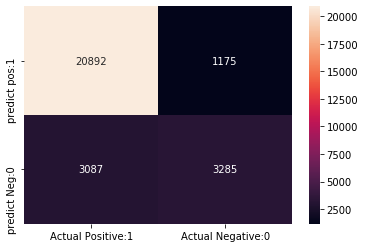

In [80]:
#Visualizing the matrix
cm_matrix=pd.DataFrame(data=cm,columns=['Actual Positive:1','Actual Negative:0'],index=['predict pos:1','predict Neg:0'])
sns.heatmap(cm_matrix,annot=True,fmt='d')

# Classification report

In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          No       0.87      0.95      0.91     22067
         Yes       0.74      0.52      0.61      6372

    accuracy                           0.85     28439
   macro avg       0.80      0.73      0.76     28439
weighted avg       0.84      0.85      0.84     28439



# Model Evaluation and imporvement

We employ 3 techniques.
These are recursive feature elimination, k-fold cross validation and hyperparameter optimization using GridSearchCV

In [82]:
#Recursive feature elimination

In [ ]:
from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator=reg, step=1, cv=5, scoring='accuracy')
rfecv = rfecv.fit(x_train, y_train)

In [84]:
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 111


In [85]:
# transform the training data
x_train_rfecv = rfecv.transform(x_train)
# train classifier
reg.fit(x_train_rfecv, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
# test classifier on test data
x_test_rfecv = rfecv.transform(x_test)
y_pred_rfecv = reg.predict(X_test_rfecv)

NameError: name 'X_test_rfecv' is not defined

In [ ]:
# print mean accuracy on transformed test data and labels
print ("Classifier score: {:.4f}".format(reg.score(X_test_rfecv,y_test)))

We see that the score has not improved with recursive feature elimination technique.

#Next we try with K-fold cross validation

In [ ]:
# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score
scores = cross_val_score(reg, x_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

In [ ]:
# compute Average cross-validation score
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Our, original model score is found to be 0.8476. The average cross-validation score is 0.8474. So, we can conclude that cross-validation does not result in performance improvement.

#Next we try with Hyperparameter Optimization using GridSearch CV

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]
grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)

grid_search.fit(X_train, y_train)

In [ ]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

In [ ]:
# calculate GridSearch CV score on test set
print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

In [ ]:
#Not much improvement with these 3 techniques and hence original model stays good for prediction